In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = sns.load_dataset('titanic')
dataset.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
dataset["age"].fillna(dataset["age"].mean(), inplace=True)

# 1. Descriptive Statistics

## a. Measures of Central Tendency
( Mean, Median, Mode )

In [4]:
mn = dataset["age"].mean()
mn

np.float64(29.69911764705882)

In [5]:
md = np.median(dataset["fare"])
md

np.float64(14.4542)

In [6]:
mo = dataset["fare"].mode()[0]
mo

np.float64(8.05)

In [7]:
dataset["fare"].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [8]:
mo1 = dataset["sex"].mode()[0]
mo1

'male'

## b. Measures of Variability
( Range, MAD, Variance, Std )

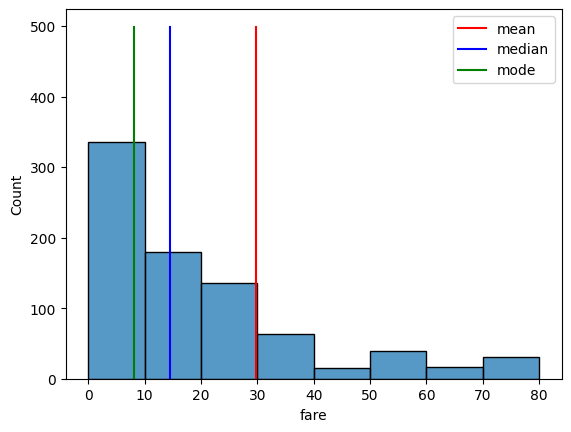

In [9]:
sns.histplot(x='fare', data=dataset, bins=[i for i in range(0,81,10)])
plt.plot([mn for i in range(0,500)], [i for i in range(0,500)], c='red', label="mean")
plt.plot([md for i in range(0,500)], [i for i in range(0,500)], c='blue', label="median")
plt.plot([mo for i in range(0,500)], [i for i in range(0,500)], c='green', label="mode")
plt.legend()
plt.show()

In [10]:
# Range
max_r = dataset["age"].max() 
min_r = dataset["age"].min() 
range_ = max_r - min_r
range_

np.float64(79.58)

In [11]:
# Mean Absolute Deviation
sec_a = np.array([75,65,73,68,72,67])
sec_b = np.array([90,47,43,96,93,51])
no = np.array([1,2,3,4,5,6])

In [12]:
mean_a = sec_a.mean() 
mean_a

np.float64(70.0)

In [13]:
mean_b = sec_b.mean()
mean_b

np.float64(70.0)

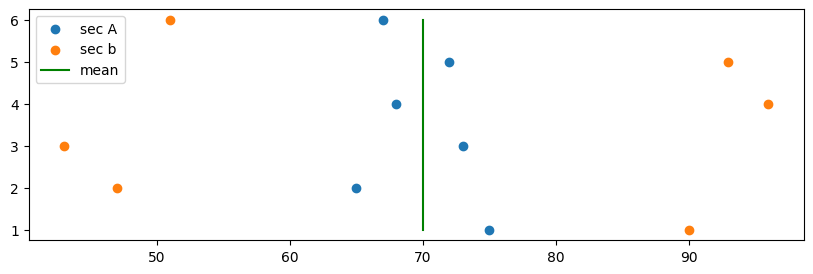

In [14]:
plt.figure(figsize=(10,3))
plt.scatter(sec_a, no, label="sec A")
plt.scatter(sec_b, no, label="sec b")
plt.plot([70,70,70,70,70,70], no, c="green", label="mean")
plt.legend()
plt.show()

In [15]:
mad_a = np.sum(np.abs(sec_a - sec_a.mean()))/len(sec_a)
mad_b = np.sum(np.abs(sec_b - sec_b.mean()))/len(sec_b)

In [16]:
mad_a , mad_b

(np.float64(3.3333333333333335), np.float64(23.0))

In [17]:
# Standard Deviation 
np.std(sec_a), np.std(sec_b)

(np.float64(3.559026084010437), np.float64(23.18045153428495))

In [18]:
# Variance
np.var(sec_a), np.var(sec_b)

(np.float64(12.666666666666666), np.float64(537.3333333333334))

In [19]:
dataset["age"].var()

np.float64(169.0523999372108)

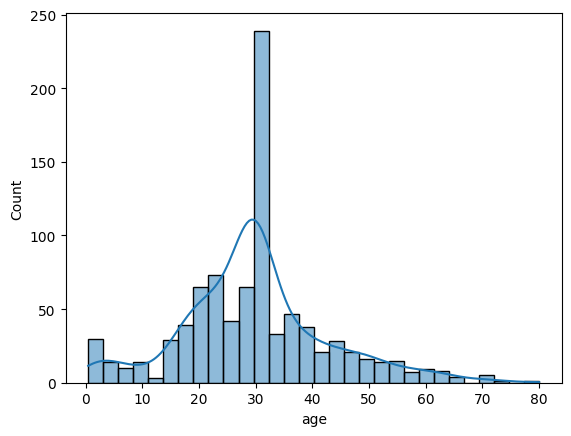

In [20]:
sns.histplot(x='age', data=dataset, kde=True)
plt.show()

## c. Percentiles 
( Percentage, Quartiles, Boxplot )

In [21]:
# Percentiles
np.percentile(dataset["age"], 25), np.percentile(dataset["age"], 75)

(np.float64(22.0), np.float64(35.0))

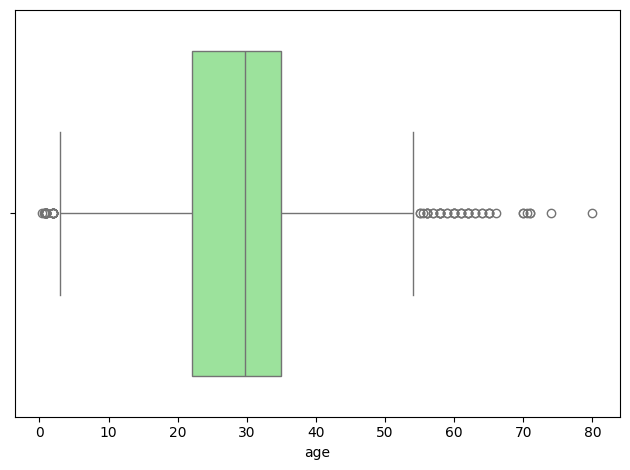

In [22]:
sns.boxplot(x="age", data=dataset, color='lightgreen')
plt.tight_layout()
plt.show()

## d. Measures of shape
( Skewness )

In [23]:
# skew > 0 positive skewness
# skew < 0 negative skewness
# 0 No skewness
dataset["age"].skew()

np.float64(0.4344880940129925)

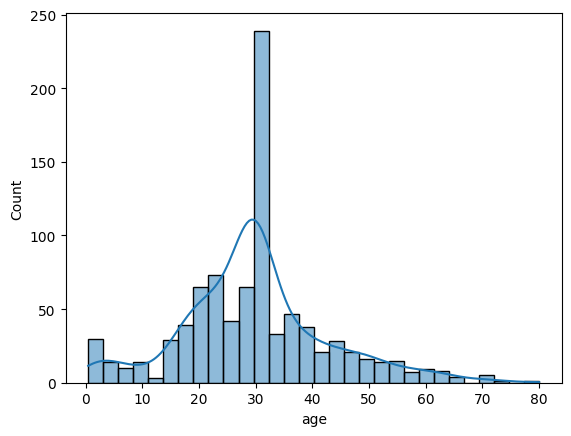

In [24]:
sns.histplot(x="age", data=dataset, kde=True)
plt.show()

## e. Covariance and Correlation

In [25]:
# Covariance
dataset.select_dtypes(include=['int64','float64']).cov()

,survived,pclass,age,sibsp,parch,fare
survived,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787
pclass,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196
age,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200
sibsp,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734
parch,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052
fare,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846


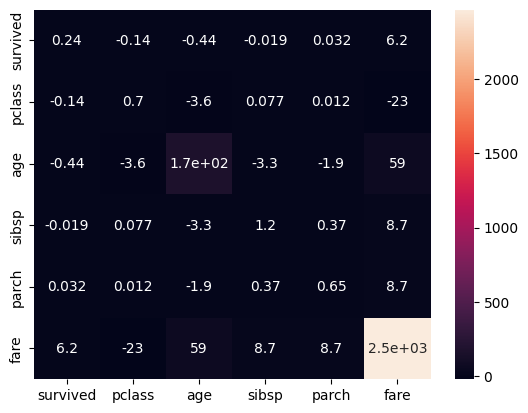

In [26]:
sns.heatmap(data=dataset.select_dtypes(include=['int64','float64']).cov(), annot=True)
plt.show()

In [27]:
# Correlation
dataset.select_dtypes(include=['int64','float64']).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


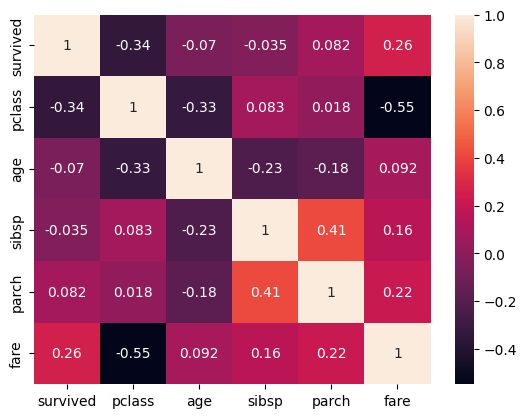

In [28]:
sns.heatmap(data=dataset.select_dtypes(include=['int64','float64']).corr(), annot=True)
plt.show()

# 2. Inferential Statistics

## a. Central Limit Theorem

In [29]:
pop_data = [np.random.randint(10, 100) for i in range(10000)]
pop_table = pd.DataFrame({"pop_data":pop_data})
pop_table.head()

,pop_data
0,91
1,30
2,61
3,52
4,41


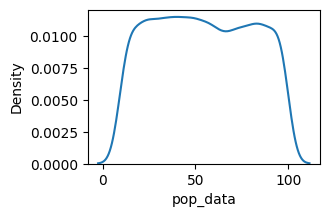

In [30]:
plt.figure(figsize=(3,2))
sns.kdeplot(x="pop_data", data=pop_table)
plt.show()

In [31]:
(10000*10)/100

1000.0

In [32]:
sample_mean = []
for no_sample in range(60):
    sample_data = []
    for data in range(500):
        sample_data.append(np.random.choice(pop_data))
    sample_mean.append(np.mean(sample_data))

In [33]:
sample_M = pd.DataFrame({"Sample_Mean":sample_mean})

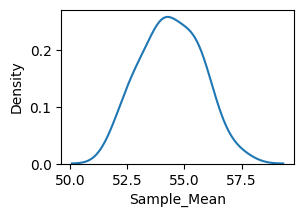

In [34]:
plt.figure(figsize=(3,2))
sns.kdeplot(x="Sample_Mean", data=sample_M)
plt.show()

In [35]:
# Let's check out Population mean and Sample mean both are equal or no.
np.mean(pop_data), np.mean(sample_mean)

(np.float64(54.265), np.float64(54.4047))

## b. Hypothesis Testing

### 1. Z-Tests

FORMULA -> Z = (x̄ - μ)/(𝜎 / √n )

Where:

• x̄ = sample mean

• μ = population mean

• σ = population standard deviation

• n = sample size

#### Q1. A teacher claims that the mean score of students in this class is greater than 82 with a standard deviation of 20. If a sample of 81 students was selected with a mean score of 90.

In [36]:
import scipy.stats as st

In [37]:
sample_mean = 90
population_mean = 82
std = 20
no_sample = 81
alpha = 0.05

In [38]:
z_cal = (sample_mean - population_mean) / (std / np.sqrt(no_sample))
print(z_cal)

3.5999999999999996


In [39]:
z_table = st.norm.ppf(1-alpha)
print(z_table)

1.6448536269514722


In [40]:
if z_table < z_cal:
    print('Ha is right')
else:
    print('Ho is right')

Ha is right


#### Q2. Scenario: Imagine you work for an e-commerce company, and your team is responsible for analyzing customer purchase data. You want to determine whether a new website design has led to a significant increase in the average purchase amount compared to the old design.

#### Data: You have collected data from a random sample of 30 customers who made purchases on the old website design and 30 customers who made purchases on the new website design. You have the sample means, sample standard deviations, and sample sizes for both groups.

#### • Old design data = [45.2, 42.8, 38.9, 43.5, 41.0, 44.6, 40.5, 42.7, 39.8, 41.4, 44.3, 39.7, 42.1, 40.6, 43.0, 42.2, 41.5, 39.6, 44.0, 43.1, 38.7, 43.9, 42.0, 41.9, 42.8, 43.7, 41.3, 40.9, 42.5, 41.6]

#### • New design data = [48.5, 49.1, 50.2, 47.8, 48.7, 49.9, 48.0, 50.5, 49.8, 49.6, 48.2, 48.9, 49.7, 50.3, 49.4, 50.1, 48.6, 48.3, 49.0, 50.0, 48.4, 49.3, 49.5, 48.8, 50.6, 50.4, 48.1, 49.2, 50.7, 50.8]

#### • population std = 2.5

FORMULA ->   Z = (x̄new - x̄old)/(𝜎 / √n )

In [41]:
old_design_data = np.array([45.2, 42.8, 38.9, 43.5, 41.0, 44.6, 40.5, 42.7, 39.8, 41.4, 44.3, 39.7, 42.1, 40.6, 43.0, 42.2, 41.5, 39.6, 44.0, 43.1, 38.7, 43.9, 42.0, 41.9, 42.8, 43.7, 41.3, 40.9, 42.5, 41.6])
new_design_data = np.array([48.5, 49.1, 50.2, 47.8, 48.7, 49.9, 48.0, 50.5, 49.8, 49.6, 48.2, 48.9, 49.7, 50.3, 49.4, 50.1, 48.6, 48.3, 49.0, 50.0, 48.4, 49.3, 49.5, 48.8, 50.6, 50.4, 48.1, 49.2, 50.7, 50.8])

In [42]:
mean_new = np.mean(new_design_data)
mean_old = np.mean(old_design_data)
std = 2.5
n_sample = 30
alpha = 0.05

In [43]:
z_calc = (mean_new - mean_old) / (std/np.sqrt(n_sample))
print(z_calc)

16.11034615808528


In [44]:
z_table1 = st.norm.ppf(1-alpha)
print(z_table1)

1.6448536269514722


In [45]:
if z_table < z_calc:
    print('Ha is right')
else:
    print('Ho is right')

Ha is right


### 2. T-tests

FORMULA -> Z = (x̄ - μ)/(s / √n ) 

Where:

• x̄ = sample mean

• μ = population mean

• s = sample standard deviation

• n = sample size

#### Q1. A manufacturer claims that the average weight of a bag of potato chips is 150 grams. A sample of 25 bags is taken, and the average weight is found to be 148 grams, with a standard deviation of 5 grams. Test the manufacturer’s claim using a one-tailed t-test with a significance level of 0.05.

df = n - 1

In [46]:
sample_mean = 148
population_mean = 150
sample_std = 5
no_sample = 25

In [47]:
t_cal = (sample_mean - population_mean) / (sample_std / np.sqrt(no_sample))
print(t_cal)

-2.0


In [48]:
t_table = st.t.ppf(0.05, 24)
print(t_table)

-1.7108820799094282


In [49]:
if t_table > t_cal:
    print('Ha is right')
else:
    print('Ho is right')

Ha is right


#### Q2. A company wants to test whether there is a difference in productivity between two teams. They randomly select 20 employees from each team and record their productivity scores. The mean productivity score for Team A is 80 with a standard deviation of 5, while the mean productivity score for Team B is 75 with a standard deviation of 6. Test at a 5% level of significance whether there is a difference in productivity between the two teams.

degree of freedom (df) = 20 + 20 - 2

                    df = n + n - 2
FORMULA ->  Z = (x̄A - x̄B) - (μA - μA) / sqrt((sA ** 2/nA) + (sB ** 2/nB))

In [50]:
# Given data
mean_A, sd_A, n_A = 80, 5, 20
mean_B, sd_B, n_B = 75, 6, 20

In [51]:
# Generate sample data (normally distributed for demonstration)
np.random.seed(42)  # for reproducibility
data_A = np.random.normal(mean_A, sd_A, n_A)
data_B = np.random.normal(mean_B, sd_B, n_B)

In [52]:
# Perform independent two-sample t-test
t_stat, p_value = st.ttest_ind(data_A, data_B)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.4063742886052664
p-value: 0.0015683141010341612


In [53]:
# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0 → Significant difference in productivity.")
else:
    print("Fail to Reject H0 → No significant difference in productivity.")

Reject H0 → Significant difference in productivity.


In [54]:
# Using Formula
t_cal = (mean_A - mean_B) / (np.sqrt((sd_A**2/n_A) + (sd_B**2/n_B)))
print(t_cal)

2.862991671569341


In [55]:
t_table = st.t.ppf(1-0.025, 38)
print(t_table)

2.024394163911969


In [56]:
if t_table < t_cal:
    print('Ha is right')
else:
    print('Ho is right')

Ha is right


#### Q3. A company wants to test whether a new training program improves the typing speed of its employees. The typing speed of 20 employees was recorded before and after the training program. The data is given below. Test at a 5% level of significance whether the training program has an effect on the typing speed of the employees.

• Before: 50, 60, 45, 65, 55, 70, 40, 75, 80, 65, 70, 60, 50, 55, 45, 75, 60, 50, 65, 70

• After: 60, 70, 55, 75, 65, 80, 50, 85, 90, 70, 75, 65, 55, 60, 50, 80, 65, 55, 70, 75

df = n - 1

FORMULA -> Z = (x̄A - x̄B) - (μA - μA) / sqrt((std_a ** 2/nA) + (std_b ** 2/nB))

In [57]:
Before = np.array([50, 60, 45, 65, 55, 70, 40, 75, 80, 65, 70, 60, 50, 55, 45, 75, 60, 50, 65, 70])

After = np.array([60, 70, 55, 75, 65, 80, 50, 85, 90, 70, 75, 65, 55, 60, 50, 80, 65, 55, 70, 75])

In [58]:
std_a = np.std(After)
std_b = np.std(Before)
mean_a = np.mean(After)
mean_b = np.mean(Before)

In [59]:
t_calcu = (mean_a - mean_b) / (np.sqrt(((std_a**2)/len(After))+((std_b**2)/len(Before))))
t_calcu

np.float64(2.061200527128206)

In [60]:
t_table = st.t.ppf(1-0.025, 19)
print(t_table)

2.093024054408263


In [61]:
if t_table < t_calcu:
    print('Ha is right')
else:
    print('Ho is right')

Ho is right


### 3. Chi Square Test

Formula -> χ2 = ∑ (Oi − Ei)2 / Ei

Oi = Observed Frequency

Ei = Expected Frequency

χ2 = Chi-Square statistic

#### Q1. A fair die is rolled 120 times and the following results are obtained:
#### Face 1: 22 times
#### Face 2: 17 times
#### Face 3: 20 times
#### Face 4: 26 times
#### Face 5: 22 times
#### Face 6: 13 times
#### Test at a 5% level of significance whether the die is fair.

In [62]:
Observed = np.array([22, 17, 20, 26, 22, 13])
Expected = np.array([20, 20, 20, 20, 20, 20])

In [63]:
chi_calc = np.sum(np.square(Observed - Expected)/Expected)
print(chi_calc)

5.1000000000000005


In [64]:
chi_table = st.chi2.ppf(1 - 0.05, 5)
print(chi_table)

11.070497693516351


In [65]:
if chi_table < chi_calc:
    print('Ha is right')
else:
    print('Ho is right')

Ho is right


#### Q2. A study was conducted to investigate whether there is a relationship between gender and the preferred genre of music. A sample of 235 people was selected, and the data collected is shown below. Test at a 5% level of significance whether there is a significant association between gender and music preference.

| Gender | Pop | Hip Hop | Classical | Rock |
| ------ | --- | ------- | --------- | ---- |
| Male   | 40  | 45      | 25        | 10   |
| Female | 35  | 30      | 20        | 30   |

Calculate Ei = sum_col1 * sum_r1 / no_of_sample

In [66]:
row1 = np.array([40, 45, 25, 10])
row2 = np.array([35, 30, 20, 30])

In [67]:
sum_row1 = np.sum(row1)
sum_row2 = np.sum(row2)
sum_row = np.array([sum_row1, sum_row2])
sum_row

array([120, 115])

In [68]:
sum_cal = row1+row2
sum_cal

array([75, 75, 45, 40])

In [69]:
Expected = []
for i in sum_row:
    for j in sum_cal:
        value = (i*j)/235
        Expected.append(value)

In [70]:
Observed = np.array([40, 45, 25, 10, 35, 30, 20, 30])

In [71]:
chi_calc = np.sum((np.square(Observed - Expected))/ Expected)
print(chi_calc)

13.788747987117553


In [72]:
# df = (row-1) * (col-1) = 3
chi_table = chi_table = st.chi2.ppf(1 - 0.05, 3)
print(chi_table)

7.814727903251179


In [73]:
if chi_table < chi_calc:
    print('Ha is right')
else:
    print('Ho is right')

Ha is right
